In [82]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [83]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [84]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3468,0247-SLUJI,Male,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.70,19.7,No
5447,8660-BUETV,Female,0,No,No,3,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,44.75,148.05,No
2970,2815-CPTUL,Male,1,No,No,5,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.25,331.9,Yes
783,4678-DVQEO,Female,0,No,No,1,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,52.20,52.2,Yes
2296,4706-DGAHW,Male,1,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,45.20,45.2,No


In [85]:
df.drop('customerID',axis=1,inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [86]:
pd.to_numeric(df.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [87]:
df.shape

(7043, 20)

In [88]:
df1=df[df.TotalCharges != ' ']
df1.shape

(7032, 20)

In [89]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

c:\users\sourabh.jain\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


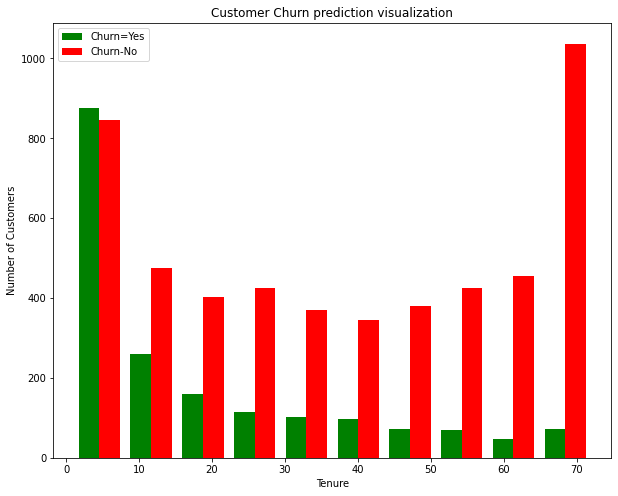

In [90]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure
plt.figure(figsize=(10,8))
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn prediction visualization')
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn-No'])
plt.legend()

In [91]:
def print_unique_col_value(df):
    for col in df:
        if df[col].dtypes=='object':
            print(f'{col} : {df[col].unique()}')

In [92]:
print_unique_col_value(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [93]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

c:\users\sourabh.jain\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [94]:
print_unique_col_value(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [95]:
yes_no_cols=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [96]:
for col in yes_no_cols:
    df1[col].replace({'Yes': 1 , 'No': 0} , inplace = True)

c:\users\sourabh.jain\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [97]:
df1['gender'].replace({'Female' : 1 , 'Male' : 0 },inplace = True)

In [98]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [99]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [100]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5029,1,0,1,0,0.084507,1,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0
992,1,0,1,1,0.295775,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1891,1,1,0,0,0.000000,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [101]:
x=df2.drop('Churn',axis=1)
y=df2.Churn

In [102]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=5)

In [103]:
xtrain.shape

(5625, 26)

In [104]:
import tensorflow as tf
from tensorflow import keras

In [105]:
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(xtrain,ytrain,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5540 - accuracy: 0.6980
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4462 - accuracy: 0.7840
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4275 - accuracy: 0.7950
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4207 - accuracy: 0.8004
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4173 - accuracy: 0.8021
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4146 - accuracy: 0.8052
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4128 - accuracy: 0.8052
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4113 - accuracy: 0.8068
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4104 - accuracy: 0.8078
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4087 - accura

176/176 [==============================] - 0s 1ms/step - loss: 0.3802 - accuracy: 0.8268
Epoch 82/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3794 - accuracy: 0.8277
Epoch 83/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3794 - accuracy: 0.8268
Epoch 84/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3789 - accuracy: 0.8265
Epoch 85/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3798 - accuracy: 0.8263
Epoch 86/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3784 - accuracy: 0.8277
Epoch 87/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3789 - accuracy: 0.8265
Epoch 88/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3785 - accuracy: 0.8272
Epoch 89/100
176/176 [==============================] - 0s 874us/step - loss: 0.3785 - accuracy: 0.8261
Epoch 90/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3783 - accuracy

In [106]:
model.evaluate(xtest,ytest)

44/44 [==============================] - 0s 1ms/step - loss: 0.4560 - accuracy: 0.7804


[0.4560030698776245, 0.7803837656974792]

In [107]:
yp=model.predict(xtest)
ypred=[]
for x in yp:
    if x > 0.5:
        ypred.append(1)
    else:
        ypred.append(0)

44/44 [==============================] - 0s 1ms/step


In [108]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       999
           1       0.64      0.55      0.59       408

    accuracy                           0.78      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.77      0.78      0.77      1407



Text(69.0, 0.5, 'Truth')

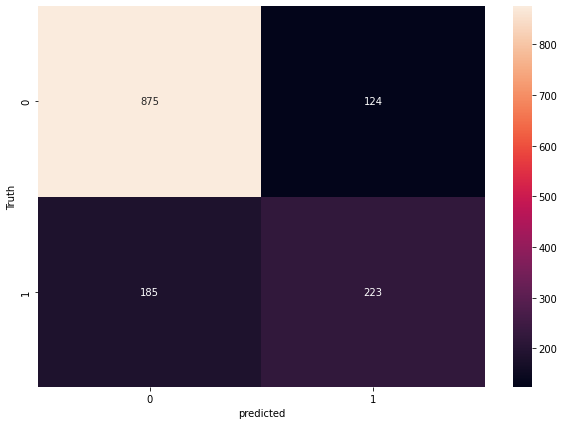

In [109]:
cm=tf.math.confusion_matrix(labels=ytest,predictions=ypred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [110]:
ytest.value_counts()

0    999
1    408
Name: Churn, dtype: int64

In [111]:
ytrain.value_counts()

0    4164
1    1461
Name: Churn, dtype: int64

# Handling imbalanced data set
## 1. Under Sampling majority class

In [112]:
count_class_0 , count_class_1 = df2.Churn.value_counts()
count_class_1

1869

In [113]:
df_class_0 = df2[df2['Churn']==0]
df_class_1 = df2[df2['Churn']==1]

In [114]:
df_class_0_under=df_class_0.sample(count_class_1)
df_test_under=pd.concat([df_class_0_under,df_class_1])
df_test_under.shape

(3738, 27)

In [115]:
df_test_under.Churn.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [116]:
def ANN(xtrain,ytrain,xtest,ytest,loss,weight):
    model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                 loss=loss,
                 metrics=['accuracy'])
    
    if weight==-1:
        model.fit(xtrain,ytrain,epochs=100)
    else:
        model.fit(xtrain,ytrain,epochs=100,class_weight=weight)
    print()
    print(model.evaluate(xtest,ytest))
    print()
    ypred= model.predict(xtest)
    ypred=np.round(ypred)
    print()
    print(classification_report(ytest,ypred))
        
    return ypred
    

In [117]:
x=df_test_under.drop('Churn',axis=1)
y=df_test_under.Churn

xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.2, random_state=15, stratify=y)

In [118]:
ypred_under=ANN(xtrain,ytrain,xtest,ytest,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5898 - accuracy: 0.7057
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4993 - accuracy: 0.7689
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4827 - accuracy: 0.7719
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4778 - accuracy: 0.7742
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4743 - accuracy: 0.7769
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4718 - accuracy: 0.7753
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4706 - accuracy: 0.7746
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4683 - accuracy: 0.7742
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4664 - accuracy: 0.7756
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4659 - accuracy: 0.7732
Epoch 11/

94/94 [==============================] - 0s 987us/step - loss: 0.4321 - accuracy: 0.7923
Epoch 83/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4318 - accuracy: 0.7940
Epoch 84/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4303 - accuracy: 0.7950
Epoch 85/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4308 - accuracy: 0.7983
Epoch 86/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4307 - accuracy: 0.7973
Epoch 87/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4304 - accuracy: 0.7950
Epoch 88/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4305 - accuracy: 0.7980
Epoch 89/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4300 - accuracy: 0.7977
Epoch 90/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4294 - accuracy: 0.7960
Epoch 91/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4294 - accuracy: 0.7993
Epoch 92/10

## Oversampling minority class

In [119]:
df_class_1_over=df_class_1.sample(count_class_0,replace=True)
df_test_over=pd.concat([df_class_0,df_class_1_over],axis=0)

In [120]:
df_test_over.Churn.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [121]:
x=df_test_over.drop('Churn',axis=1)
y=df_test_over.Churn

xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.2, random_state=15, stratify=y)

In [122]:
ypred_under=ANN(xtrain,ytrain,xtest,ytest,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5671 - accuracy: 0.7136
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4960 - accuracy: 0.7594
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4903 - accuracy: 0.7614
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4864 - accuracy: 0.7623
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4838 - accuracy: 0.7648
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4810 - accuracy: 0.7657
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4792 - accuracy: 0.7660
Epoch 8/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4780 - accuracy: 0.7660
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4771 - accuracy: 0.7667
Epoch 10/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4754 - accura

259/259 [==============================] - 0s 1ms/step - loss: 0.4380 - accuracy: 0.7930
Epoch 82/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4378 - accuracy: 0.7914
Epoch 83/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4373 - accuracy: 0.7937
Epoch 84/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4364 - accuracy: 0.7916
Epoch 85/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4368 - accuracy: 0.7920
Epoch 86/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4362 - accuracy: 0.7942
Epoch 87/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4370 - accuracy: 0.7915
Epoch 88/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4365 - accuracy: 0.7939
Epoch 89/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4356 - accuracy: 0.7923
Epoch 90/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4359 - accuracy: 

## 3. SMOTE

In [123]:
x=df2.drop('Churn',axis=1)
y=df2.Churn

In [124]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')

x_sm , y_sm =smote.fit_sample(x,y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [125]:
xtrain,xtest,ytrain,ytest=train_test_split(x_sm,y_sm, test_size=0.2, random_state=15, stratify=y_sm)
ypred_under=ANN(xtrain,ytrain,xtest,ytest,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5901 - accuracy: 0.6792
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4795 - accuracy: 0.7717
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4699 - accuracy: 0.7757
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4647 - accuracy: 0.7770
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4613 - accuracy: 0.7798
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4577 - accuracy: 0.7793
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4550 - accuracy: 0.7815
Epoch 8/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4526 - accuracy: 0.7826
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4506 - accuracy: 0.7821
Epoch 10/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4480 - accura

259/259 [==============================] - 0s 2ms/step - loss: 0.3802 - accuracy: 0.8358
Epoch 82/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3798 - accuracy: 0.8351
Epoch 83/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3798 - accuracy: 0.8312
Epoch 84/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3781 - accuracy: 0.8324
Epoch 85/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3793 - accuracy: 0.8332
Epoch 86/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3794 - accuracy: 0.8333
Epoch 87/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3782 - accuracy: 0.8367
Epoch 88/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3775 - accuracy: 0.8339
Epoch 89/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3776 - accuracy: 0.8343
Epoch 90/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3771 - accuracy: 

## 4. Ensemble

In [126]:
x=df2.drop('Churn',axis=1)
y=df2.Churn

xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.2, random_state=15, stratify=y)

In [127]:
df3=xtrain.copy()
df3['Churn']=ytrain

In [128]:
df_class_0=df3[df3.Churn==0]
df_class_1=df3[df3.Churn==1]

In [129]:
def get_train_batch(df_majority,df_minority,start,end):
    df_train=pd.concat([df_majority[start:end],df_minority],axis=0)
    
    xtrain=df_train.drop('Churn',axis=1)
    ytrain=df_train.Churn
    
    return xtrain,ytrain

In [130]:
xtrain,ytrain=get_train_batch(df_class_0,df_class_1,0,1495)
ypred1=ANN(xtrain,ytrain,xtest,ytest,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5768 - accuracy: 0.7261
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5117 - accuracy: 0.7565
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4964 - accuracy: 0.7609
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4894 - accuracy: 0.7622
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4850 - accuracy: 0.7672
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4827 - accuracy: 0.7635
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4809 - accuracy: 0.7686
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4792 - accuracy: 0.7686
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4779 - accuracy: 0.7702
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4764 - accuracy: 0.7709
Epoch 11/

94/94 [==============================] - 0s 1ms/step - loss: 0.4419 - accuracy: 0.7957
Epoch 83/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4407 - accuracy: 0.7977
Epoch 84/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4405 - accuracy: 0.7997
Epoch 85/100
94/94 [==============================] - 0s 992us/step - loss: 0.4408 - accuracy: 0.8010
Epoch 86/100
94/94 [==============================] - 0s 974us/step - loss: 0.4408 - accuracy: 0.7953
Epoch 87/100
94/94 [==============================] - 0s 987us/step - loss: 0.4407 - accuracy: 0.7973
Epoch 88/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4393 - accuracy: 0.7960
Epoch 89/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4401 - accuracy: 0.7967
Epoch 90/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4394 - accuracy: 0.7987
Epoch 91/100
94/94 [==============================] - 0s 973us/step - loss: 0.4383 - accuracy: 0.8017
Epoch

In [131]:
xtrain,ytrain=get_train_batch(df_class_0,df_class_1,1495,2990)
ypred2=ANN(xtrain,ytrain,xtest,ytest,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 1s 1ms/step - loss: 0.5699 - accuracy: 0.7324
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5140 - accuracy: 0.7622
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4980 - accuracy: 0.7639
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4919 - accuracy: 0.7679
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4884 - accuracy: 0.7649
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4853 - accuracy: 0.7666
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4823 - accuracy: 0.7652
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4804 - accuracy: 0.7662
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4795 - accuracy: 0.7692
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4777 - accuracy: 0.7682
Epoch 11/

94/94 [==============================] - 0s 1ms/step - loss: 0.4358 - accuracy: 0.7920
Epoch 83/100
94/94 [==============================] - 0s 957us/step - loss: 0.4360 - accuracy: 0.7880
Epoch 84/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4354 - accuracy: 0.7876
Epoch 85/100
94/94 [==============================] - 0s 859us/step - loss: 0.4357 - accuracy: 0.7866
Epoch 86/100
94/94 [==============================] - 0s 956us/step - loss: 0.4341 - accuracy: 0.7913
Epoch 87/100
94/94 [==============================] - 0s 926us/step - loss: 0.4350 - accuracy: 0.7903
Epoch 88/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4339 - accuracy: 0.7866
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4343 - accuracy: 0.7910
Epoch 90/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4333 - accuracy: 0.7890
Epoch 91/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4332 - accuracy: 0.7910
Epoch

In [132]:
xtrain,ytrain=get_train_batch(df_class_0,df_class_1,2990,4130)
ypred3=ANN(xtrain,ytrain,xtest,ytest,'binary_crossentropy',-1)

Epoch 1/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5862 - accuracy: 0.7245
Epoch 2/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5170 - accuracy: 0.7575
Epoch 3/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4969 - accuracy: 0.7643
Epoch 4/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4900 - accuracy: 0.7700
Epoch 5/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4837 - accuracy: 0.7700
Epoch 6/100
83/83 [==============================] - 0s 971us/step - loss: 0.4793 - accuracy: 0.7719
Epoch 7/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4784 - accuracy: 0.7723
Epoch 8/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4749 - accuracy: 0.7746
Epoch 9/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4733 - accuracy: 0.7772
Epoch 10/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4714 - accuracy: 0.7750
Epoch 1

83/83 [==============================] - 0s 970us/step - loss: 0.4246 - accuracy: 0.8011
Epoch 83/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4240 - accuracy: 0.8049
Epoch 84/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4239 - accuracy: 0.8038
Epoch 85/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4235 - accuracy: 0.8030
Epoch 86/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4227 - accuracy: 0.8023
Epoch 87/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4232 - accuracy: 0.8027
Epoch 88/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4226 - accuracy: 0.8019
Epoch 89/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4223 - accuracy: 0.8049
Epoch 90/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4225 - accuracy: 0.7992
Epoch 91/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4217 - accuracy: 0.8027
Epoch 92/10

In [133]:
ypred_final=ypred1.copy()

for i in range(len(ypred1)):
    n_ones=ypred1[i]+ypred2[i]+ypred3[i]
    if n_ones>1:
        ypred_final[i] = 1
    else:
        ypred_final[i] = 0

In [134]:
print(classification_report(ytest,ypred_final))

              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1033
           1       0.50      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.75      1407

